<h2><center>Supreme Court Oral Arguments Outcome Prediction Team</center></h2>
<h2 style="margin-top: -15px; margi-bottom: 10px;"><center>Second Checkpoint</center></h2>

### Project and Team Information
**Team members:** Federico Dominguez Molina, Jessup Jong, Chanteria Milner, and Michael Plunkett

**Project summary:** The project uses historic United States Supreme Court cases to train natural language processing models to predict case rulings.
**Project repository:** [Link](https://github.com/michplunkett/supreme-court-ml-predictions)
**Project assumptions and things to know:**
1. The number of unique roles within the advocates' file is too numerous to be helpful, so we merged them into 5 categories. While this merger may remove some variability and nuance in the file, we believe it will make it easier to derive meaningful conclusions.
    - The groupings for the roles are as follows: inferred, for respondent, for partitioner, and for amicus curiae
2. The years included within this data set are 2014 to 2019.
3. The datasets included within the previously mentioned year range are ones where the winnings side was either 0 or 1 (no missing, etc.).

**Note:** If you would like any examples of code that we used, they are all on the bottom of the page the section titled `Code Examples`.

### Cleaning and Processing the data

We process the data through three steps:
1. [Michael: Gonna fill this area out before 6 PM]

### Data Examples

<b><i>cases_df: descriptive information for all of the court cases</i></b>

In [78]:
cases.head(2)

,id,year,citation,title,petitioner,respondent,docket_no,court,decided_date,win_side,is_eq_divided
0,2014_13-553,2014,575 US _,Alabama Department of Revenue v. CSX Transport...,"Alabama Department of Revenue, et al.","CSX Transportation, Inc.",13-553,Roberts Court,"Mar 4, 2015",1,False
1,2014_13-895,2014,575 US _,Alabama Legislative Black Caucus v. Alabama,"Alabama Democratic Conference, et al.","Alabama, et al.",13-895,Roberts Court,"Mar 25, 2015",1,False


<b><i>speakers_df: descriptive information of speakers across cases</i></b>

In [79]:
speakers.head(2)

,speaker_name,speaker_type,speaker_role,speaker_key
0,Earl Warren,J,justice,earl_warren
1,Harry F. Murphy,A,NaN,harry_f_murphy


<b><i>voters_df: descriptive information for voters in each case; includes only SCOTUS Judges</i></b>

In [80]:
voters.head(2)

,id,case_id,voter,vote
0,23291,2014_13-553,j__john_g_roberts_jr,1
1,23291,2014_13-553,j__antonin_scalia,1


<b><i>advocates_df: descriptive information for advocates in a given case (excluding SCOTUS judges) and their roles</i></b> 

In [81]:
advocates.head(2)

,id,case_id,advocate,side,role
0,23291,2014_13-553,andrew_l_brasher,1,"Solicitor General, Alabama, for the petitioner"
1,23291,2014_13-553,carter_g_phillips,0,for the respondent


<b><i>conversations_df: information on the collection of utterances for a given case</i></b>

In [82]:
conversations.head(2)

,id,case_id,winning_side
0,23291,2014_13-553,1
1,23252,2014_13-895,1


<b><i>utterances_df: information on speech uttered during a case, including the speaker, text, and a tokenization of the text; utterances make up conversations.</i></b>

In [83]:
utterances.head(2)

,case_id,speaker,speaker_type,conversation_id,id,text,tokens
0,2014_13-553,j__john_g_roberts_jr,J,23291,23291__0_000,"we'll hear argument next in case no. 13553, th...","['hear', 'argument', 'case', 'alabama', 'depar..."
1,2014_13-553,andrew_l_brasher,A,23291,23291__0_001,"thank you, mr. chief justice, and may it pleas...","['thank', 'mr', 'chief', 'justice', 'court', '..."


### Models: Logistic Regression

**What is logistic regression?**


Logistic regression is a supervised machine learning model which, based on the training data, predicts the probability of a binary outcome. This is a supervised learning approach because the model is trained on data where the outcome is known. 

Logistic regression is also a classification model because it predicts the probability of a binary outcome, where it predicts if the petitioner, given the 'bag of words', won or lost the case.

It is also worth noting that regularization can also be added to the model to prevent overfitting, but we are not currently using this feature.

**What can we infer using logistic regression on our dataset?**

We want to infer the probability of a petitioner winning a case given the 'bag of words' from the oral arguments. We can train a logistic regression model on the 'bag of words' of the cases pertaining the training dataset. We can then use such model to make predictions on cases not seen by the model.

**What were our findings using logistic regression?**

We applied logistic regression models to four different datasets and observed the below results. We used the following hyperparameters as defaults in our regression: a test size of 0.20, random state 123, and a maximum of 1000 iterations.

All Utterances: This dataset comprises a bag of words created from all utterances in the cases between 2014 and 2019, including judge, advocate, and adversary statements. The model achieved an accuracy of 54.05%, slightly better than random chance.

Judge Utterances: This dataset focuses on a bag of words from judge statements only. The model's accuracy was 52.05%, underperforming compared to the model using all utterances.

Advocate Utterances: Using a bag of words created solely from advocate statements, the model achieved an accuracy of 75.67%, significantly outperforming the model using all utterances.

Adversary Utterances: Similarly, this dataset consists of a bag of words derived only from adversary statements. The model obtained an accuracy of 78.37%, outperforming all other models and emerging as the best performer.

In conclusion, models using advocate and adversary utterances independently have higher predictive power compared to models using judge utterances or a combination of all utterances.


```
------------------------------------------
Running regression on total_utterances...
Creating bag of words
Starting the Logistic Regression
Accuracy score: 0.5405405405405406
------------------------------------------
------------------------------------------
Running regression on judge_utterances...
Creating bag of words
Starting the Logistic Regression
Accuracy score: 0.5205479452054794
------------------------------------------
------------------------------------------
Running regression on advocate_utterances...
Creating bag of words
Starting the Logistic Regression
Accuracy score: 0.7567567567567568
------------------------------------------
------------------------------------------
Running regression on adversary_utterances...
Creating bag of words
Starting the Logistic Regression
Accuracy score: 0.7837837837837838
------------------------------------------
```

In [ ]:
# I'm going to add charts for each regression model [Michael]

### Models: Visualizing Hyperparameter Tuning - Test Sizes

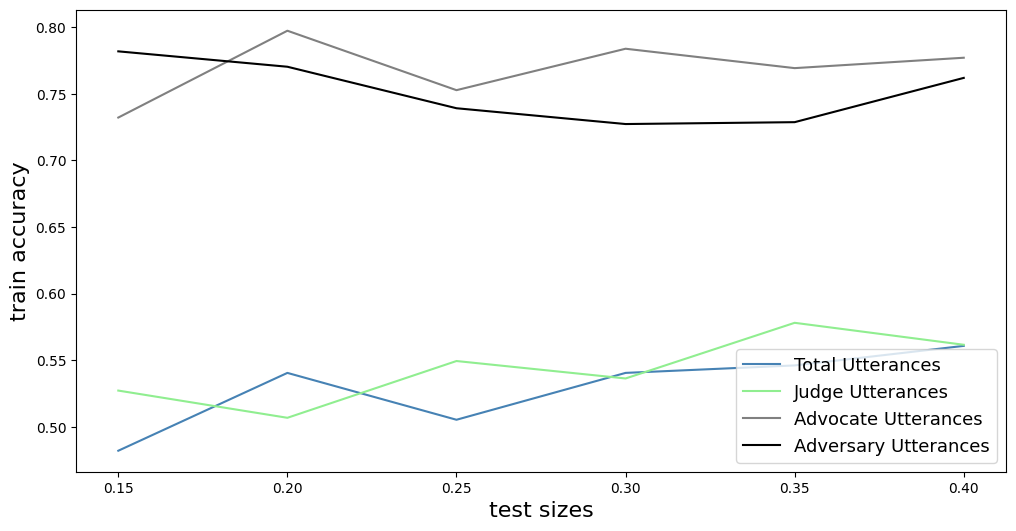

In [84]:
# Collecting test accuracies
acc1 = []
acc2 = []
acc3 = []
acc4 = []

test_sizes = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40]

for size in test_sizes:
    l = LogisticRegression(testsize=size, print_results=False)
    accs = l.run()
    acc1.append(accs[0])
    acc2.append(accs[1])
    acc3.append(accs[2])
    acc4.append(accs[3])

# Plotting test accuracies
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(test_sizes, acc1, color="steelblue", label="Total Utterances")
ax.plot(test_sizes, acc2, color="lightgreen", label="Judge Utterances")
ax.plot(test_sizes, acc3, color="gray", label="Advocate Utterances")
ax.plot(test_sizes, acc4, color="black", label="Adversary Utterances")
ax.legend(loc="lower right", fontsize=13)
ax.set_xlabel("test sizes", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

### Models: Visualizing Hyperparameter Tuning - Feature Sizes

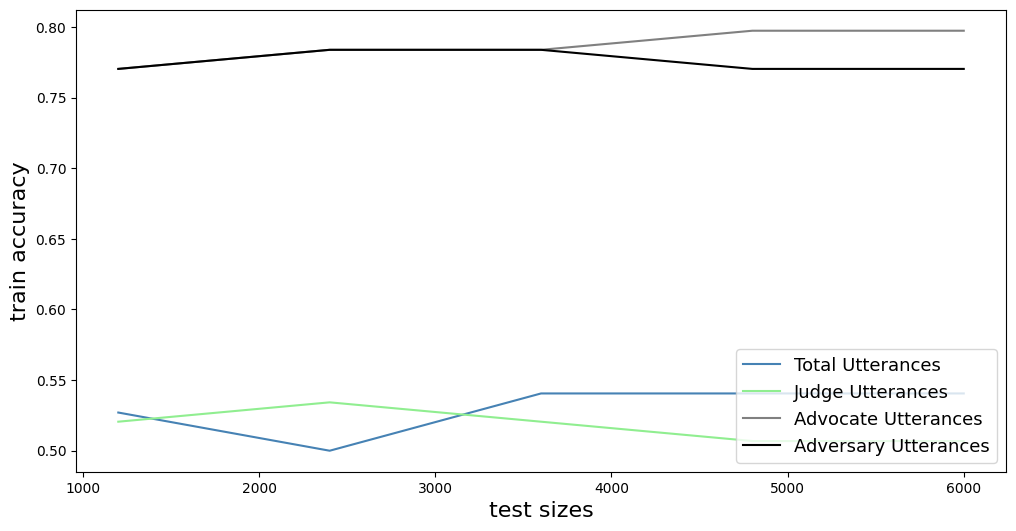

In [85]:
# Collecting test accuracies
acc1 = []
acc2 = []
acc3 = []
acc4 = []

feature_sizes = [1200, 2400, 3600, 4800, 6000]

for ftr in feature_sizes:
    l = LogisticRegression(maxfeatures=ftr, print_results=False)
    accs = l.run()
    acc1.append(accs[0])
    acc2.append(accs[1])
    acc3.append(accs[2])
    acc4.append(accs[3])

# Plotting test accuracies
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(feature_sizes, acc1, color="steelblue", label="Total Utterances")
ax.plot(feature_sizes, acc2, color="lightgreen", label="Judge Utterances")
ax.plot(feature_sizes, acc3, color="gray", label="Advocate Utterances")
ax.plot(feature_sizes, acc4, color="black", label="Adversary Utterances")
ax.legend(loc="lower right", fontsize=13)
ax.set_xlabel("test sizes", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

### Setup

In [72]:
# Setup for data examples and plots
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Setup for data examples and plots
from supreme_court_predictions.util.files import get_full_data_pathway
datapath = get_full_data_pathway("clean_convokit/")

# Loading the dataframes
utterances = pd.read_csv(datapath + "utterances_df.csv")
advocates = pd.read_csv(datapath + "advocates_df.csv")
cases = pd.read_csv(datapath + "cases_df.csv")
conversations = pd.read_csv(datapath + "conversations_df.csv")
speakers = pd.read_csv(datapath + "speakers_df.csv")
voters = pd.read_csv(datapath + "voters_df.csv")

### Code Examples

DataCleaner Class

In [73]:
"""
This file houses the class that is used to clean the convokit data and convert
it to a usable format.
"""

import json
import re

import pandas as pd
from convokit import Corpus, download

from supreme_court_predictions.util.contants import (
    ENCODING_UTF_8,
    FILE_MODE_READ,
    LATEST_YEAR,
)
from supreme_court_predictions.util.files import get_full_data_pathway


class DataCleaner:
    """
    This class houses the functions needed to clean the convokit data and turn
    it into a usable format.
    """

    def __init__(self):
        self.cases_df = None
        self.clean_case_ids = None  # stores the case IDs to use
        self.clean_utterances_list = None
        self.speakers_df = None
        self.utterances_df = None

        # Get local directory
        self.local_path = get_full_data_pathway("convokit/")
        print(f"Working in {self.local_path}")

        # Set output path
        self.output_path = get_full_data_pathway("clean_convokit/")
        print(f"Data will be saved to {self.output_path}")

    def get_data(self):
        """
        Loads and outputs the Supreme Court Corpus data.
        """

        print("Loading Supreme Court Corpus Data...")
        corpus = Corpus(filename=download("supreme-corpus"))
        corpus.dump("supreme_corpus", base_path=self.local_path)

    # Begin reading data
    def load_data(self, file_name):
        """
        Opens the data and returns it as a dictionary.

        :param file_name: The name of the file to open
        :return: The data as a dictionary
        """

        path = self.local_path + f"supreme_corpus/{file_name}"
        if "jsonl" in file_name:
            data = []
            with open(
                path, encoding=ENCODING_UTF_8, mode=FILE_MODE_READ
            ) as json_file:
                json_list = list(json_file)

            for json_str in json_list:
                clean_json = json.loads(json_str)
                data.append(clean_json)
        else:
            with open(
                path, encoding=ENCODING_UTF_8, mode=FILE_MODE_READ
            ) as file:
                data = json.load(file)
        return data

    def get_cases_df(self, cases_lst):
        """
        Converts the cases list to a metadata dataframe. Also provides list of
        cleaned and filtered cases to use.

        :param cases_lst: The cases' list containing dictionaries of cases.
        :return: The cases dataframe of case metadata.
        """

        # Convert to dataframe
        cases_df = self.load_cases_df(cases_lst)

        # Clean, filter, and return dataframe data
        self.clean_case_ids = self.get_clean_cases(cases_df)
        clean_cases_df = cases_df.loc[
            (cases_df.loc[:, "id"].isin(self.clean_case_ids)), :
        ]

        clean_cases_df = clean_cases_df.astype({"win_side": "int32"})
        return clean_cases_df

    @staticmethod
    def load_cases_df(cases_lst):
        """
        Generates and unclean and unfiltered dataframe of court cases.

        :param cases_lst: The cases' list containing dictionaries of cases.
        :return: The uncleaned/unfiltered cases dataframe of case metadata.
        """

        # Convert to dataframe
        metadata = {
            "id": [],
            "year": [],
            "citation": [],
            "title": [],
            "petitioner": [],
            "respondent": [],
            "docket_no": [],
            "court": [],
            "decided_date": [],
            "win_side": [],
            "is_eq_divided": [],
        }

        for case in cases_lst:
            # get metadata
            for attr, obvs in metadata.items():
                obvs.append(case[attr])

        return pd.DataFrame(metadata)

    @staticmethod
    def get_clean_cases(cases):
        """
        Generates a list of cleaned case IDs.

        :param cases: An uncleaned dataframe of cases.
        : return: A list of clean case IDs
        """

        # Clean cases to 0/1 win side and cases from the last 5 years
        case_ids = cases.loc[
            (
                (cases.loc[:, "win_side"] == 0.0)
                | (cases.loc[:, "win_side"] == 1.0)
            )
            & (cases.loc[:, "year"] >= LATEST_YEAR - 5),
            "id",
        ].unique()

        return case_ids

    @staticmethod
    def speakers_to_df(speakers_dict):
        """
        Converts the speakers dictionary to a pandas dataframe.

        :param speakers_dict: The speaker's dictionary
        :return: The speakers dataframe
        """

        dict_list = []
        for speaker_key in list(speakers_dict.keys()):
            speaker_data = speakers_dict[speaker_key]["meta"]
            speaker_data["speaker_key"] = re.sub(r"^j__", "", speaker_key)
            dict_list.append(speaker_data)

        df = pd.DataFrame(dict_list)
        df.rename(
            columns={
                "name": "speaker_name",
                "type": "speaker_type",
                "role": "speaker_role",
            },
            inplace=True,
        )

        # Remove low-quality data - unknown speaker types
        df_cleaned = df.loc[(df.loc[:, "speaker_type"] != "U"), :]

        return df_cleaned

    def get_conversation_dfs(self, conversations_dict):
        """
        Converts the conversations dictionary to several pandas dataframes.

        :param conversations_dict: The conversations' dictionary
        :return: The conversations dataframe, advocates dataframe,
                and voters dataframe
        """
        metadata_list = []
        advocates_list = []
        voters_list = []

        for conversation_id in list(conversations_dict.keys()):
            conversation_data = conversations_dict[conversation_id]["meta"]

            # Filter dataset based on cleaned case ids and 0/1 side
            if conversation_data["case_id"] in self.clean_case_ids:
                clean_dict = {
                    "id": conversation_id,
                    "case_id": conversation_data["case_id"],
                    "winning_side": conversation_data["win_side"],
                }

                advocates = conversation_data["advocates"]
                voters = conversation_data["votes_side"]

                for advocate in advocates:
                    if advocates[advocate]["side"] in [0, 1]:
                        advocate_dict = {
                            "id": conversation_id,
                            "case_id": conversation_data["case_id"],
                            "advocate": advocate,
                            "side": advocates[advocate]["side"],
                            "role": advocates[advocate]["role"],
                        }
                        advocates_list.append(advocate_dict)

                if voters:
                    for voter, vote in voters.items():
                        if vote in [0, 1]:
                            vote_dict = {
                                "id": conversation_id,
                                "case_id": conversation_data["case_id"],
                                "voter": voter,
                                "vote": vote,
                            }
                            voters_list.append(vote_dict)
                else:
                    vote_dict = {
                        "id": conversation_id,
                        "case_id": conversation_data["case_id"],
                    }
                    voters_list.append(vote_dict)

                metadata_list.append(clean_dict)

        conversation_metadata_df = pd.DataFrame(metadata_list)
        advocates_df = pd.DataFrame(advocates_list)
        voters_df = pd.DataFrame(voters_list)

        # Clean voters df - one vote per voter per case
        voters_df = voters_df.drop_duplicates(
            subset=["case_id", "voter"], keep="last"
        ).reset_index(drop=True)

        return conversation_metadata_df, advocates_df, voters_df

    def clean_utterances(self, utterances_list):
        """
        Cleans the utterances list.

        :param utterances_list: The utterances list
        :return: The cleaned utterances list
        """

        # Filter dataset based on cleaned case ids
        utterances_list_filtered = [
            u
            for u in utterances_list
            if u["meta"]["case_id"] in self.clean_case_ids
        ]

        clean_utterances_list = []
        for utterance in utterances_list_filtered:
            clean_dict = {
                "case_id": utterance["meta"]["case_id"],
                "speaker": utterance["speaker"],
                "speaker_type": utterance["meta"]["speaker_type"],
                "conversation_id": utterance["conversation_id"],
                "id": utterance["id"],
            }
            utterance_text = utterance["text"]
            clean_utterance = utterance_text.lower()
            no_newline = re.sub(r"[\r\n\t]", " ", clean_utterance)
            no_bracket = re.sub(r"[\[\]\(\)]", "", no_newline)

            clean_dict["text"] = no_bracket

            clean_utterances_list.append(clean_dict)

        utterances_df = pd.DataFrame(clean_utterances_list)

        return clean_utterances_list, utterances_df

    def parse_all_data(self):
        """
        Cleans and parses all the data.
        """
        print("Parsing cases...")
        cases_list = self.load_data("cases.jsonl")
        self.cases_df = self.get_cases_df(cases_list)

        print("Parsing speakers...")
        speakers_dict = self.load_data("speakers.json")
        self.speakers_df = self.speakers_to_df(speakers_dict)

        print("Parsing conversations metadata...")
        conversations_dict = self.load_data("conversations.json")
        (
            self.conversations_df,
            self.advocates_df,
            self.voters_df,
        ) = self.get_conversation_dfs(conversations_dict)

        print("Parsing utterances...")
        utterances_list = self.load_data("utterances.jsonl")
        self.clean_utterances_list, self.utterances_df = self.clean_utterances(
            utterances_list
        )

        self.speakers_df.to_csv(
            self.output_path + "/speakers_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )
        self.conversations_df.to_csv(
            self.output_path + "/conversations_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )
        self.advocates_df.to_csv(
            self.output_path + "/advocates_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )
        self.voters_df.to_csv(
            self.output_path + "/voters_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )
        self.utterances_df.to_csv(
            self.output_path + "/utterances_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )
        self.cases_df.to_csv(
            self.output_path + "/cases_df.csv",
            index=False,
            encoding=ENCODING_UTF_8,
        )

        print("Data saved to " + self.output_path)


Tokenizer Class

In [74]:
"""
A module implementing a Tokenizer class that tokenizes text.
The Tokenizer class provides methods for initializing the required
components and processing text data. It is designed to handle tokenization
tasks efficiently and effectively in a user-friendly manner.
"""

import pandas as pd
import spacy

from supreme_court_predictions.util.files import get_full_data_pathway


class Tokenizer:
    """
    Tokenizer class that uses the spaCy library for
    tokenizing / lemmatizing text. This class initializes and provides
    methods for tokenizing text.
    """

    SPACY_PACKAGE = "en_core_web_sm"

    def __init__(self):
        """
        Initializes the Tokenizer class by setting up the local path
        and loading the spaCy model.
        """
        # Get local directory
        self.local_path = get_full_data_pathway("clean_convokit/")
        print(f"Data will be saved to: \n{self.local_path}")

        try:
            self.nlp = spacy.load(self.SPACY_PACKAGE, disable=["parser", "ner"])
        except OSError:
            print("Spacy not present. Downloading files.")
            spacy.cli.download(self.SPACY_PACKAGE)
            self.nlp = spacy.load(self.SPACY_PACKAGE, disable=["parser", "ner"])
        print("Spacy module successfully loaded.")

        self.tokenize()

    def spacy_apply(self, text):
        """
        Applies the spaCy tokenizer on the input text
        and returns a list of tokens.

        :param text: Input text to tokenize.
        :return: List of tokenized words.
        """
        doc = self.nlp(text)
        return [
            token.lemma_
            for token in doc
            if token.is_alpha and not token.is_stop
        ]

    def tokenize(self):
        """
        Tokenizes the text in the utterances DataFrame
        and saves the result as a new CSV file.
        """
        utterances_df = pd.read_csv(self.local_path + "utterances_df.csv")

        utterances_df["tokens"] = (
            utterances_df.loc[:, "text"].astype(str).apply(self.spacy_apply)
        )
        utterances_df.to_csv(self.local_path + "utterances_df.csv", index=False)
        utterances_df.to_pickle(self.local_path + "utterances_df.p")
        print("Spacy tokenization complete.")


Token Aggregation Class

In [75]:
"""
This file provides aggregate tokens per case.
"""
import pickle

import pandas as pd

from supreme_court_predictions.util.files import get_full_data_pathway


class TokenAggregations:
    """
    TODO: Need document string
    """

    def __init__(self):
        self.all_tokens = None
        self.advocate_tokens = None
        self.adversary_tokens = None
        self.judge_tokens = None

        # Get local directory
        self.local_path = get_full_data_pathway("clean_convokit/")
        print(f"Working in {self.local_path}")

        # Set output path
        self.output_path = get_full_data_pathway("processed/")
        print(f"Data will be saved to {self.output_path}")

        # Get advocate and voter side dataframes
        self.win_side = self.get_win_side()
        self.vote_side = self.get_vote_side()
        self.advocate_side = self.get_advocate_side()
        self.utterances = self.get_utterances()
        self.utterance_sides = self.append_side(self.utterances)

    def get_utterances(self):
        """
        Load the utterances dataframe. Keep only the relevant columns, i.e.,
        "case_id", "speaker", "tokens", and "speaker_type".

        :return A dataframe of case utterances.
        """
        utterances = pd.read_csv(self.local_path + "utterances_df.csv")
        return utterances.loc[
            :, ["case_id", "speaker", "tokens", "speaker_type"]
        ]

    def get_win_side(self):
        """
        Get the winning side of the cases.

        :return A dataframe containing case IDs and the winning side (0=for
                respondent, 1=for petitioner)
        """
        win_side_df = pd.read_csv(self.local_path + "cases_df.csv").rename(
            columns={"id": "case_id"}
        )
        return win_side_df.loc[:, ["case_id", "win_side"]]

    def get_vote_side(self):
        """
        Get the voting side of the cases (for Judges only).

        :return A dataframe containing case IDs and the voting side (0=for
                respondent, 1=for petitioner)
        """
        vote_side_df = pd.read_csv(self.local_path + "voters_df.csv")
        vote_side_df = vote_side_df.rename(
            columns={"vote": "side", "voter": "advocate"}
        )
        return vote_side_df.loc[:, ["case_id", "advocate", "side"]]

    def get_advocate_side(self):
        """
        Get the advocating side of the cases (for non-Judges only).

        :return A dataframe containing case IDs and the advocating side (0=for
                respondent, 1=for petitioner)
        """
        advocate_side_df = pd.read_csv(self.local_path + "advocates_df.csv")
        return advocate_side_df.loc[:, ["case_id", "advocate", "side"]]

    def get_case_tokens(self, utterance_tokens):
        """
        Returns a dataframe of utterances tokens per case, including win_side of
        the case. The utterance_tokens dataframe is expected to have the columns
        "case_id" and "tokens".

        :param utterance_tokens: A dataframe of case utterances to aggregate
            tokens of.
        """
        # Aggregate tokens by case_id
        case_ids = utterance_tokens.loc[:, "case_id"].unique()
        agg_tokens = {"case_id": [], "tokens": []}

        for case in case_ids:
            tokens = []
            agg_tokens["case_id"].append(case)
            for token in utterance_tokens.loc[
                utterance_tokens.loc[:, "case_id"] == case, "tokens"
            ]:
                # Preprocess instances - from string to list
                token = token.strip("[")
                token = token.strip("]")
                token = token.replace("'", "")
                token = token.replace(" ", "")
                token = token.split(",")

                tokens.extend(token)

            agg_tokens["tokens"].append(tokens)

        agg_tokens = pd.DataFrame.from_dict(agg_tokens)

        # merging win_side onto tokens
        agg_tokens_win_side = pd.merge(
            agg_tokens, self.win_side, how="left", on="case_id"
        )

        return agg_tokens_win_side

    def get_all_case_tokens(self):
        """
        Gets all the tokens for a given case and the outcome of the case.

        :return A dataframe of case utterances to aggregate tokens of.
        """
        return self.get_case_tokens(
            self.utterance_sides.loc[:, ["case_id", "tokens"]]
        )

    def append_side(self, utterances):
        """
        Adds the speaker's advocate or vote side to the utterances dataframe.

        :param utterances: The utterances dataframe; must have only the columns
            case_id, speaker, speaker_type, and tokens

        :returns A dataframe with the side of the speaker appended to
                 utterances, also removing speaker accounts who don't have a
                 side.
        """
        # Renaming the speaker column for easier merging
        ut = utterances.rename(columns={"speaker": "advocate"})

        # Merging utterances with voter (judge) and advocate sides
        ut_sides = pd.merge(
            ut,
            pd.concat([self.vote_side, self.advocate_side]),
            how="left",
            left_on=["case_id", "advocate"],
            right_on=["case_id", "advocate"],
        )

        # Remove NA values
        ut_sides = ut_sides.loc[~ut_sides.loc[:, "side"].isna(), :]
        ut_sides = ut_sides.astype({"side": "int32"})

        return ut_sides

    def get_advocate_case_tokens(self, advocate=True):
        """
        Get all tokens for individuals either in favor of the petitioner or
        opposed to the petitioner.

        :param advocate: Whether to find the tokens for those in favor
                         (advocate=True) or opposed (advocate=False)
        :return A dataframe of tokens per case for petitioner advocates.
        """
        if advocate:
            ut = self.utterance_sides.loc[
                self.utterance_sides.loc[:, "side"] == 1, :
            ]
        else:
            ut = self.utterance_sides.loc[
                self.utterance_sides.loc[:, "side"] == 0, :
            ]
        return self.get_case_tokens(ut.loc[:, ["case_id", "tokens"]])

    def get_judge_case_tokens(self):
        """
        Get all of the tokens for only judges.

        :return A dataframe of tokens per judge per case.
        """
        ut = self.utterance_sides.loc[
            self.utterance_sides.loc[:, "speaker_type"] == "J", :
        ]
        return self.get_case_tokens(ut.loc[:, ["case_id", "tokens"]])

    def parse_all_data(self):
        """
        Generates token aggregations for 1) all speakers, 2) only advocates, 3)
        only adversaries, 4) only judges, and appends the winning side of the
        case. DataFrames and exports them as pickle objects (if applicable).
        """
        print("Grabbing token aggregation for all cases...")
        self.all_tokens = self.get_all_case_tokens()

        print("Grabbing token aggregation for advocates...")
        self.advocate_tokens = self.get_advocate_case_tokens(True)

        print("Grabbing token aggregation for adversaries...")
        self.adversary_tokens = self.get_advocate_case_tokens(False)

        print("Grabbing token aggregation for judges...")
        self.judge_tokens = self.get_judge_case_tokens()

        print("Exporting files...")
        # Outputting to CSVs
        aggregations = [
            self.all_tokens,
            self.advocate_tokens,
            self.adversary_tokens,
            self.judge_tokens,
        ]
        output_paths = [
            self.output_path + "/case_aggregations.p",
            self.output_path + "/advocate_aggregations.p",
            self.output_path + "/adversary_aggregations.p",
            self.output_path + "/judge_aggregations.p",
        ]

        for idx, agg in enumerate(aggregations):
            pickle.dump(agg, open(output_paths[idx], "wb"))

        print("Data saved to " + self.output_path)


Model Abstract Class

In [76]:
"""
This file contains the class that is the basis for all models in this package.
"""

from abc import ABC, abstractmethod


class Model(ABC):
    """
    This class sets basis for what makes up a model.
    """

    @abstractmethod
    def create(self, df):
        """
        Creates the model and returns an accuracy score.

        :param df: A dataframe used to create the model.
        :return: A sklearn model.
        """

    def create_and_measure(self, df, accuracy_measure):
        """
        Takes in a dataframe and returns the applicable accuracy measurement.

        :param df: A dataframe used to create the model.
        :param accuracy_measure: A function that is used to measure accuracy
        on the model.
        :return: Float of some accuracy measurement.
        """
        _, y_test, y_pred = self.create(df)

        return accuracy_measure(y_true=y_test, y_pred=y_pred)

    @abstractmethod
    def run(self):
        """
        Runs the model on its respective data.
        """

    @staticmethod
    def print_results(model_name="", accuracy_scores=[], dataframe_names=[]):
        """
        Prints the results of running the model.

        :param model_name (str): The name of the model.
        :param accuracy_score (list): The accuracy scores generated across for
                                      the dataframes ran in the model.
        :param dataframe_names (list): Name of the dataframes the model was ran
                                       against.
        """

        assert len(accuracy_scores) == len(dataframe_names)

        for acc, df_name in zip(accuracy_scores, dataframe_names):
            print("------------------------------------------")
            print(f"Running a {model_name} on {df_name}...")
            print(f"Accuracy score: {acc}")
            print("------------------------------------------")


Logistic Regression Class

In [77]:
"""
This LogisticRegression class runs logistic regression 
on utterance data from the Supreme Court dataset. This class aims to predict
the results of a case based on the text learned from utterances. 
"""

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression as skLR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from supreme_court_predictions.models.model import Model
from supreme_court_predictions.util.files import get_full_data_pathway


class LogisticRegression(Model):
    """
    A class that runs logistic regression on aggregated utterance and cases data
    from the Supreme Court dataset.
    """

    def __init__(
        self,
        maxfeatures=5000,
        testsize=0.20,
        randomstate=123,
        maxiter=1000,
        print_results=True,
    ):
        self.local_path = get_full_data_pathway("processed/")
        self.maxfeatures = maxfeatures
        self.testsize = testsize
        self.randomstate = randomstate
        self.maxiter = maxiter
        self.print = print_results

        self.total_utterances = pd.read_pickle(
            self.local_path + "case_aggregations.p"
        )
        self.advocate_utterances = pd.read_pickle(
            self.local_path + "advocate_aggregations.p"
        )
        self.adversary_utterances = pd.read_pickle(
            self.local_path + "adversary_aggregations.p"
        )
        self.judge_utterances = pd.read_pickle(
            self.local_path + "judge_aggregations.p"
        )


    def create(self, df):
        """
        Creates and runs a logistic regression on the given dataframe of
        utterance data.

        :param df: DataFrame containing utterance data

        :return (regressor, y_test, y_pred): A tuple that contains the
        regression model, test y-data, the predicted y-data.
        """
        vectorizer = CountVectorizer(
            analyzer="word", max_features=self.maxfeatures
        )
        vectorize_document = df.loc[:, "tokens"].apply(" ".join)
        bag_of_words_x = vectorizer.fit_transform(vectorize_document)

        bag_of_words_y = df.loc[:, "win_side"]

        X_train, X_test, y_train, y_test = train_test_split(
            bag_of_words_x,
            bag_of_words_y,
            test_size=self.testsize,
            random_state=self.randomstate,
            stratify=bag_of_words_y,
        )

        regressor = skLR(max_iter=self.maxiter)

        # Fit the classifier on the training data
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        return regressor, y_test, y_pred

    def run(self):
        """
        Runs the create function on each type of aggregated utterance.
        """

        dfs = [
            self.total_utterances,
            self.judge_utterances,
            self.advocate_utterances,
            self.adversary_utterances,
        ]
        df_names = [
            "total_utterances",
            "judge_utterances",
            "advocate_utterances",
            "adversary_utterances",
        ]

        accs = []

        for df in dfs:
            try:
                acc = self.create_and_measure(df, accuracy_score)
                accs.append(acc)
            except ValueError:
                print("------------------------------------------")
                print("Error: training data is not big enough for this subset")
                print("------------------------------------------")

        # Print the results, if applicable
        if self.print:
            self.print_results("regression", accs, df_names)

        return accs